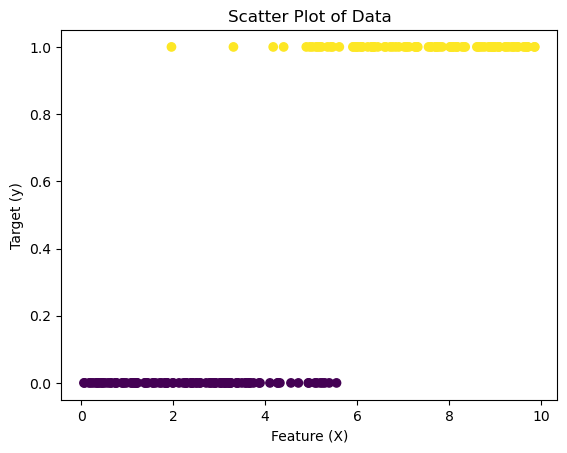

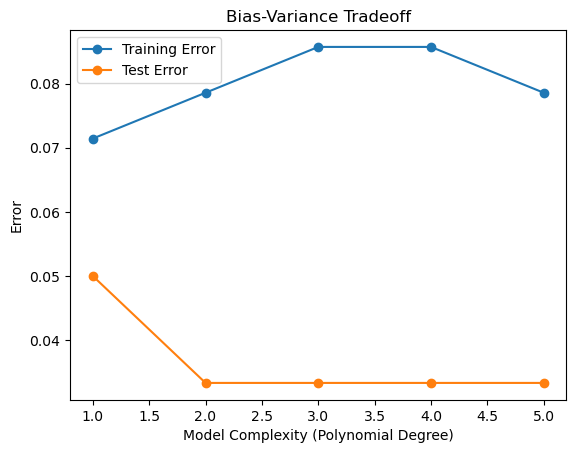

Optimal Polynomial Degree: 2
Confusion Matrix:
[[31  1]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        28

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

ROC-AUC Score: 0.990


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(200, 1) * 10  # Single feature
y = (X + np.random.normal(0, 1, (200, 1)) > 5).astype(int).ravel()  # Binary target

# Visualize the data
plt.scatter(X, y, c=y, cmap='viridis')
plt.title("Scatter Plot of Data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate models of increasing complexity
train_errors = []
test_errors = []
degrees = range(1, 6)

for degree in degrees:
    # Add polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_poly, y_train)
    
    # Predict and evaluate
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

# Plot the bias-variance tradeoff
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='o')
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.legend()
plt.show()

# Best model interpretation
best_degree = np.argmin(test_errors) + 1
print(f"Optimal Polynomial Degree: {best_degree}")
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_poly, y_train)
y_test_pred = final_model.predict(X_test_poly)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# ROC-AUC Score
y_test_prob = final_model.predict_proba(X_test_poly)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")